### Student Information
Name: 游堯中

Student ID: 107065533

GitHub ID: bill-yc-yu

Kaggle name: bill_yc_yu

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.PNG)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM19-Lab2-Master Repo](https://github.com/EvaArevalo/DM19-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/179d01d4dd984fc5ac45a894822479dd) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Nov. 23rd 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM19-Lab2-Homework](https://github.com/EvaArevalo/DM19-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th 11:59 pm, Tuesday)__. 

# Take home exercises

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [3]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [18]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

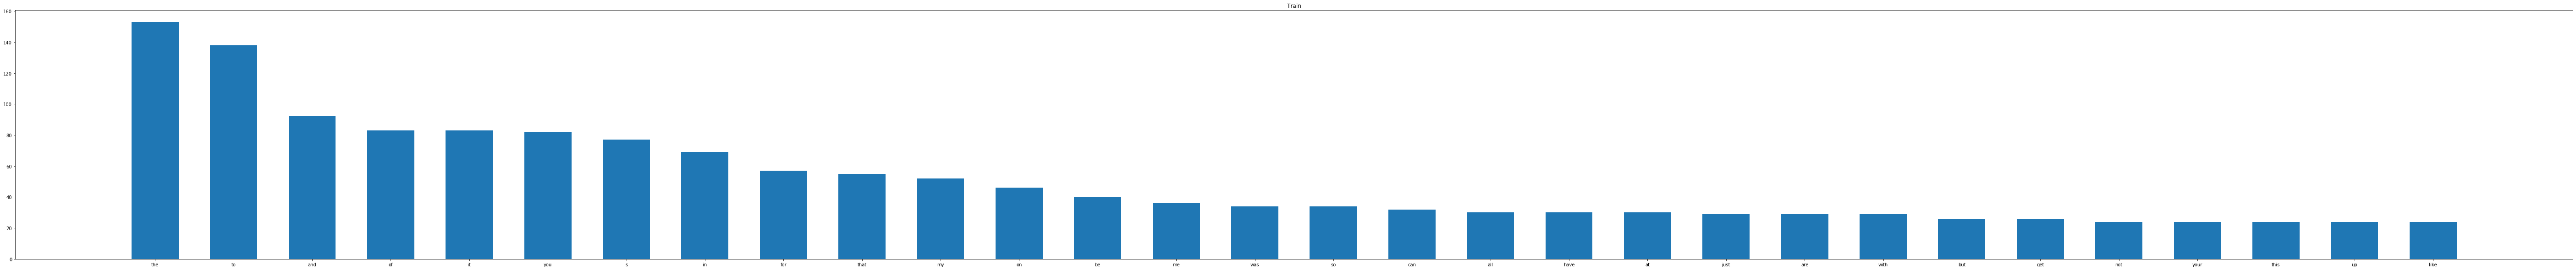

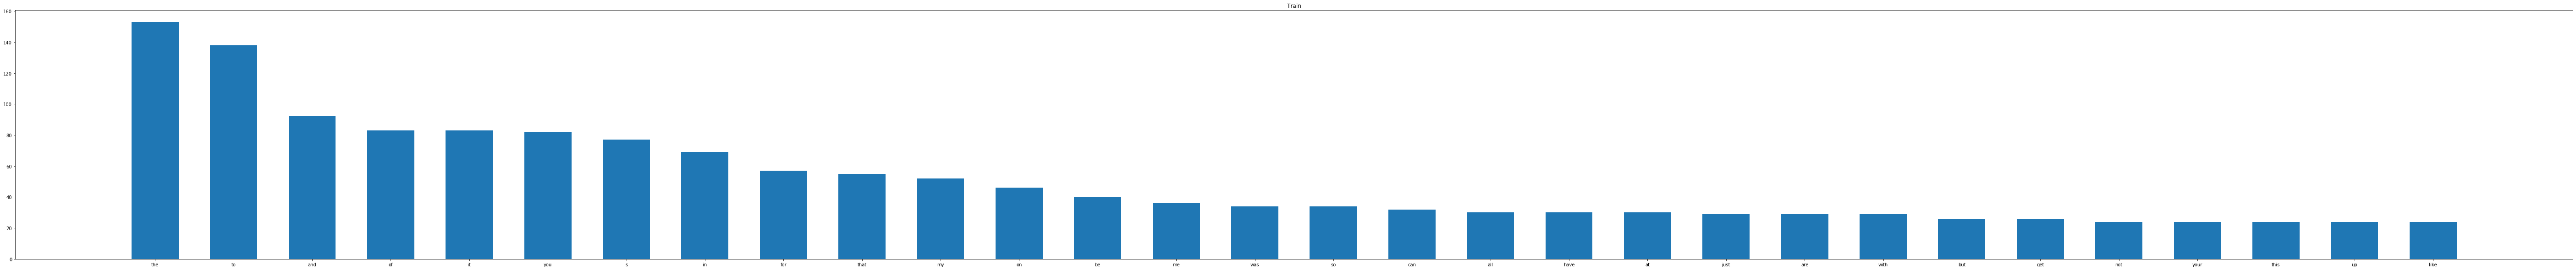

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(100,10))
plt.title('Train')
plt.bar(word, num, width=0.6)

vec = CountVectorizer().fit(test_df.text)
bag_of_words = vec.transform(test_df.text)
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in    vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

word = []
num = []
for i in range(30):
    word.append(words_freq[i][0])
    num.append(words_freq[i][1])
    
plt.figure(figsize=(100,10))
plt.title('Train')
plt.bar(word, num, width=0.6)
plt.show()

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [11]:
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
BOW_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_1000.fit(train_df['text'])

train_data_BOW_features_1000 = BOW_1000.transform(train_df['text'])

feature_names_1000 = BOW_1000.get_feature_names()
feature_names_1000[100:110]

['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday']

---
![pic9](pics/pic9.png)
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

55,15,5,9 of the true "anger" label is predicted as "anger" "fear" "joy" "sadness" respectively

16,70,13,14 of the true "fear" label is predicted as "anger" "fear" "joy" "sadness" respectively etc

The bigger number, the darker box

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [17]:
from sklearn.tree import DecisionTreeClassifier
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']


from sklearn.naive_bayes import MultinomialNB

NB_model = MultinomialNB()

## training!
NB_model = NB_model.fit(X_train, y_train)

## predict!
y_train_pred_NB = NB_model.predict(X_train)
y_test_pred_NB = NB_model.predict(X_test)

## so we get the pred result
y_test_pred_NB[:10]

from sklearn.metrics import accuracy_score

acc_train_NB = accuracy_score(y_true=y_train, y_pred=y_train_pred_NB)
acc_test_NB = accuracy_score(y_true=y_test, y_pred=y_test_pred_NB)

print('training accuracy: {}'.format(round(acc_train_NB, 2)))
print('testing accuracy: {}'.format(round(acc_test_NB, 2)))

from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred_NB))

training accuracy: 0.79
testing accuracy: 0.72
              precision    recall  f1-score   support

       anger       0.71      0.65      0.68        84
        fear       0.74      0.83      0.78       110
         joy       0.76      0.71      0.73        79
     sadness       0.65      0.64      0.64        74

    accuracy                           0.72       347
   macro avg       0.71      0.71      0.71       347
weighted avg       0.72      0.72      0.72       347



---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

Naive Bayes result is more accurate than the Decision Tree model's in this case.

Simple decision trees tend to over fit the training data more so that other techniques which means generally tree pruning has to be done. You didn't have any upfront design cost, but you'll pay that back on tuning the trees performance.
Also simple decision trees divide the data into squares so building clusters around things means it has to split a lot to encompass clusters of data. Splitting a lot leads to complex trees and raises probability you are overfitting. 

Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

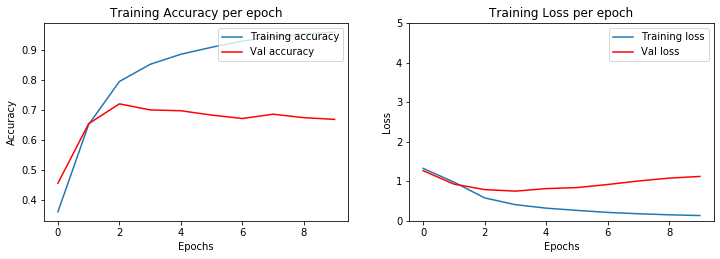

In [24]:
# Answer here
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

plt.figure(figsize=(12,8))
plt.subplot(221)
plt.title('Training Accuracy per epoch')
plt.plot(training_log['epoch'][:10],training_log['accuracy'][:10], label='Training accuracy')
plt.plot(training_log['epoch'][:10],training_log['val_accuracy'][:10], label='Val accuracy', color='r')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.subplot(222)
plt.title('Training Loss per epoch')
plt.plot(training_log['epoch'][:10],training_log['loss'][:10], label='Training loss')
plt.plot(training_log['epoch'][:10],training_log['val_loss'][:10], label='Val loss', color='r')
plt.ylim([0,5])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

With more epochs, the training accuracy raises and the loss reduces. However the validationg accuracy stayed the same and the loss raised a little bit.

Because the training data set is bigger than the validation set, the model trained may be too complicated for the validation set. Then the overfitting occurred.

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


There are differet methods to get the sentence vectors :


Doc2Vec : you can train your dataset using Doc2Vec and then use the sentence vectors.

Average of Word2Vec vectors : You can just take the average of all the word vectors in a sentence. This average vector will represent your sentence vector.

Average of Word2Vec vectors with TF-IDF : this is one of the best approach which I will recommend. Just take the word vectors and multiply it with their TF-IDF scores. Just take the average and it will represent your sentence vector.

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [29]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)


# Answer here

word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

target_words = happy_words + angry_words + sad_words + fear_words
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

load ok


NameError: name 'TSNE' is not defined

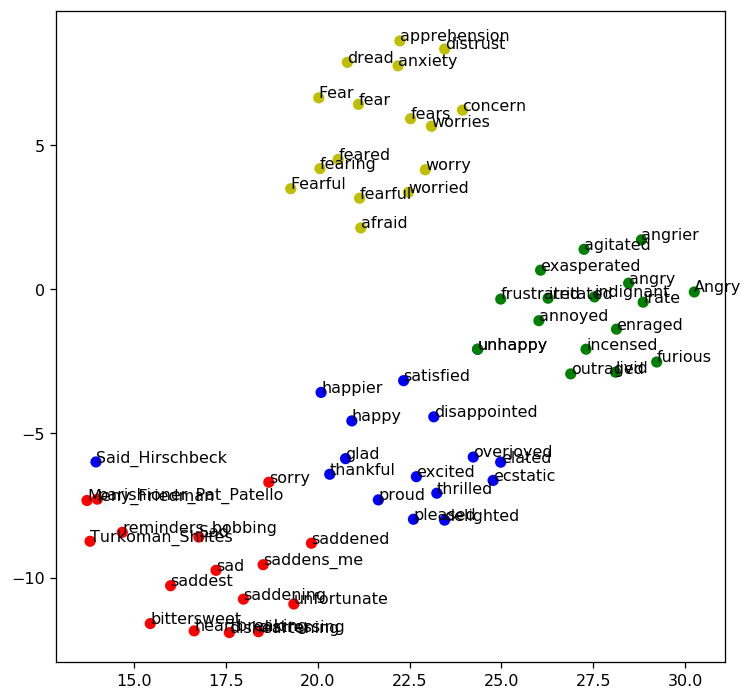

In [30]:
from sklearn.manifold import TSNE
## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# Part III

The input data is json, so it has to be normalized first.

In [ ]:
data['tweet_id'] = json_normalize(df['_source'])['tweet.tweet_id']
data['text'] = json_normalize(df['_source'])['tweet.text']
data['hashtags'] = json_normalize(df['_source'])['tweet.hashtags']

![pic10.PNG](pics/pic10.PNG)

Read emotion.csv, merge it and split it into train and test

training dataset(with emotion)

![pic11.PNG](pics/pic11.PNG)

testing dataset(without 'emotion')

![pic12.PNG](pics/pic12.PNG)

Vectorize the dataset into bag of words. Extract the top 1000 ones

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
BOW_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

BOW_1000.fit(train['text'])
BOW_1000.fit(test['text'])

Apply the training and testing input

In [ ]:
X_train = BOW_1000.transform(train['text'])

X_test = BOW_1000.transform(test['text'])

Binarize the label "emotion"

![pic13.PNG](pics/pic13.PNG)

I built a model of 2 hidden layers.
![pic14.PNG](pics/pic14.PNG)

I trained it with 5 epochs

![pic15.PNG](pics/pic15.PNG)

After the result came out:
![pic16.PNG](pics/pic16.PNG)
I decoded into the real "emotion":
![pic17.PNG](pics/pic17.PNG)

Then I uploaded onto Kaggle and got the score of 0.43257

Next I took anothor try

As to the preprocessing, I used WordNetLemmatizer of NLTK to clean the sentences:

In [ ]:
def preprocess(text):
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(word) for word in word_tokenize(text) if word not in set(string.punctuation)]
  return tokens

from tqdm import tqdm
tqdm.pandas()
main['Clean Text'] = main['Sentence'].progress_apply(lambda x: preprocess(x))
main['Clean Sentences'] = main['Clean Text'].apply(lambda x: ' '.join(x))

![pic18.PNG](pics/pic18.PNG)

Then I built an RNN model with several layers:

In [ ]:
text_input = Input(shape=(50,), name='text_input')
psn_input = Input(shape=(1,), name='psn_input')
emb = Embedding(VOCABSIZE, embedding_dim, weights=[embedding_matrix], input_length=50)(text_input)
do1 = Dropout(0.5)(emb)
bilstm = Bidirectional(LSTM(128, return_sequences=True, dropout=0.5, recurrent_dropout=0.5))(do1)
# con = Conv1D(64, 3, activation = 'relu')(bilstm)
# gmp = GlobalMaxPool1D()(bilstm)
att = AttLayer(128)(bilstm)
combined = Concatenate()([att, psn_input])
combined = Dense(128, activation='relu')(combined)
combined = Dense(64, activation='relu')(combined)
# combined = Dropout(0.5)(combined)
combined = Dense(8, activation='sigmoid')(combined)
model = Model(inputs=[text_input, psn_input], outputs=[combined])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', f1_m])

model.summary()

![pic19.PNG](pics/pic19.PNG)

Actually it was already too complicated to train with. I trained with only 2 epochs and uploaded the result. The score was only 0.32, very disappoiting and I don't know why.Maybe too few epochs.

Finally I tried different preprocessing. I removed punctuaion,tokenized the text, removed stop words, stemmed them and lemmatized them.
![pic20.PNG](pics/pic20.PNG)
Then I vectorized them with TF-IDF and trained them with multilayer perceptron classifier. The result is also only 0.38

Comment: I should have spent more time so that I could have more trys